In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

integrated_path = "../data/clean/noaa_eia_integrated.csv"
df = pd.read_csv(integrated_path)

df.head()

,year,month,stateid,state_name,tavg,cdd,hdd,sales,revenue
0,2001,1,AL,Alabama,41.2,3.0,770.0,7362.47302,407.61261
1,2002,1,AL,Alabama,46.8,14.0,599.0,7120.43573,389.88061
2,2003,1,AL,Alabama,40.0,2.0,811.0,7280.36274,429.20504
3,2004,1,AL,Alabama,44.2,6.0,679.0,7521.61292,438.66058
4,2005,1,AL,Alabama,49.2,20.0,532.0,7402.72800,420.52459


In [2]:
df.describe()

,year,month,tavg,cdd,hdd,sales,revenue
count,14208.000000,14208.000000,14208.000000,14208.000000,14208.000000,14208.000000,14208.000000
mean,2012.837838,6.445946,53.185825,96.839597,425.072706,6427.788881,641.972435
std,7.122783,3.441294,17.534871,149.274904,420.278743,6071.546831,716.358048
min,2001.000000,1.000000,-2.700000,0.000000,0.000000,392.218150,40.153100
25%,2007.000000,3.000000,39.700000,0.000000,33.750000,2311.979815,187.357878
50%,2013.000000,6.000000,54.600000,12.000000,306.000000,5034.187635,449.213445
75%,2019.000000,9.000000,67.800000,147.000000,732.000000,8397.043288,791.957818
max,2025.000000,12.000000,89.200000,844.000000,1915.000000,54396.524650,7759.617100


## Climate–Electricity Correlation Analysis
### Code Description
This code computes the correlations between climate variables (tavg, CDD, HDD) and electricity indicators (sales, revenue), and visualizes them using a heatmap.

Main steps:

1. Select relevant variables

+ Climate variables: tavg (average temperature), CDD (cooling degree days), HDD (heating degree days)

+ Electricity indicators: sales and revenue

2. Compute correlation matrix

+ Uses df[covariates].corr() to calculate the Pearson correlation coefficients.

+ Produces a 5×5 correlation matrix summarizing linear relationships among all variables.

3. Visualize the correlation matrix

+ Uses seaborn.heatmap() to plot the correlation matrix.

+ Values closer to ±1 indicate stronger linear relationships.


In [3]:
climate_cols = ["tavg", "cdd", "hdd"]
sales_cols = ["sales", "revenue"]

corr = df[climate_cols + sales_cols].corr()
corr

,tavg,cdd,hdd,sales,revenue
tavg,1.000000,0.762167,-0.968691,0.268254,0.245814
cdd,0.762167,1.000000,-0.618138,0.312368,0.275661
hdd,-0.968691,-0.618138,1.000000,-0.228883,-0.217500
sales,0.268254,0.312368,-0.228883,1.000000,0.912154
revenue,0.245814,0.275661,-0.217500,0.912154,1.000000


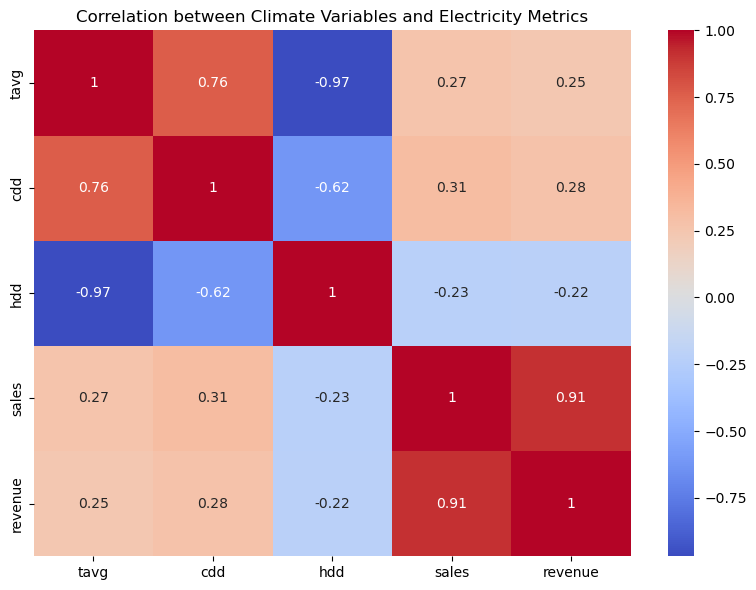

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Climate Variables and Electricity Metrics")
plt.tight_layout()
plt.savefig("../results/corr_heatmap.png", dpi=300)
plt.show()


### Findings

The correlation matrix indicates that climate variables (TAVG, CDD, HDD) show clear but relatively weak linear correlations with electricity consumption metrics such as sales and revenue (roughly 0.22–0.31). This suggests that climate factors influence electricity usage, but the strength of these linear relationships is modest.

One important reason is that the relationship between climate and electricity demand is not linear. Electricity consumption typically increases in both:

very hot months (driven by cooling needs), and

very cold months (driven by heating needs).

This produces a U-shaped seasonal pattern rather than a straight-line association. As a result, simple correlation coefficients cannot fully represent the true relationship, because they only capture linear tendencies and overlook seasonal and nonlinear behaviors.

Thus, the correlation matrix serves as an initial diagnostic tool, but more detailed analysis—such as seasonal trend plots, dual-axis comparisons, or separate analysis of CDD and HDD—is required to better understand how climate conditions shape electricity demand.

## Seasonal Analysis: Temperature, Degree Days, and Electricity Sales
### Code Description
This section computes monthly averages of key climate variables (tavg, CDD, HDD) and electricity sales, and visualizes their seasonal relationships.
We group the integrated dataset by month, calculate mean values, and generate three side-by-side dual-axis plots:

+ Average Temperature vs. Electricity Sales

+ Cooling Degree Days (CDD) vs. Electricity Sales

+ Heating Degree Days (HDD) vs. Electricity Sales

Each subplot uses:

Left y-axis for the climate variable

Right y-axis for electricity sales
This allows us to overlay variables with different scales while keeping the seasonal pattern visually comparable.

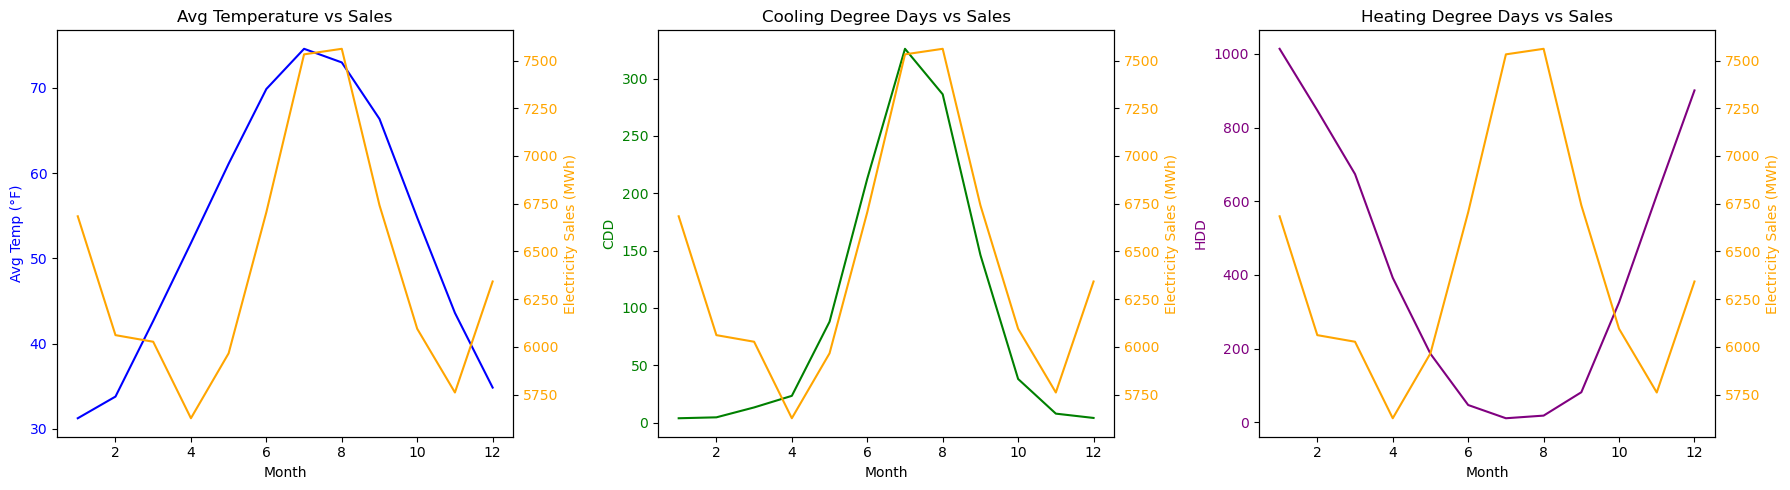

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare monthly averages
monthly_avg = df.groupby("month")[["tavg", "cdd", "hdd", "sales"]].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax1 = axes[0]
ax1.plot(monthly_avg["month"], monthly_avg["tavg"], color="blue")
ax1.set_title("Avg Temperature vs Sales")
ax1.set_xlabel("Month")
ax1.set_ylabel("Avg Temp (°F)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax1b = ax1.twinx()
ax1b.plot(monthly_avg["month"], monthly_avg["sales"], color="orange")
ax1b.set_ylabel("Electricity Sales (MWh)", color="orange")
ax1b.tick_params(axis="y", labelcolor="orange")


ax2 = axes[1]
ax2.plot(monthly_avg["month"], monthly_avg["cdd"], color="green")
ax2.set_title("Cooling Degree Days vs Sales")
ax2.set_xlabel("Month")
ax2.set_ylabel("CDD", color="green")
ax2.tick_params(axis="y", labelcolor="green")

ax2b = ax2.twinx()
ax2b.plot(monthly_avg["month"], monthly_avg["sales"], color="orange")
ax2b.set_ylabel("Electricity Sales (MWh)", color="orange")
ax2b.tick_params(axis="y", labelcolor="orange")

ax3 = axes[2]
ax3.plot(monthly_avg["month"], monthly_avg["hdd"], color="purple")
ax3.set_title("Heating Degree Days vs Sales")
ax3.set_xlabel("Month")
ax3.set_ylabel("HDD", color="purple")
ax3.tick_params(axis="y", labelcolor="purple")

ax3b = ax3.twinx()
ax3b.plot(monthly_avg["month"], monthly_avg["sales"], color="orange")
ax3b.set_ylabel("Electricity Sales (MWh)", color="orange")
ax3b.tick_params(axis="y", labelcolor="orange")

plt.tight_layout()
plt.savefig("../results/seasonal_temp_cdd_hdd_sales.png", dpi=300)
plt.show()

### Findings
1. Average Temperature vs. Sales

Temperature rises from winter to summer, peaking in July–August.

Electricity sales follow a similar seasonal curve.

This suggests that higher temperatures are associated with greater electricity consumption, largely due to increased air-conditioning use.

2. Cooling Degree Days (CDD) vs. Sales

CDD spikes sharply in June–August, representing strong cooling demand.

Electricity sales show a nearly identical peak.

CDD aligns with sales more closely than raw temperature, confirming that cooling needs are the dominant driver of summer electricity consumption.

3. Heating Degree Days (HDD) vs. Sales

HDD is highest in winter months (Dec–Feb), reflecting heating demand.

Sales increase in these months, but not as dramatically as the summer peak.

This indicates that heating contributes to electricity demand, but less significantly than cooling in most states.

## Spatial Visualization of Electricity Sales Across U.S. States
### Code Description

This code computes the average electricity sales for each U.S. state and visualizes the results using a choropleth map. The steps are:

Group the integrated dataset by state abbreviation (stateid) to obtain each state's mean electricity sales.

Use Plotly's px.choropleth() to map state-level sales onto the U.S. geographic map.

Assign color intensity based on the magnitude of electricity sales, allowing high-demand states to stand out visually.

Display the map with a continuous color scale (YlGnBu) and restrict the scope to the United States.

This visualization provides an intuitive overview of regional differences in electricity consumption.

In [ ]:
import pandas as pd
import plotly.express as px

# Compute state-level average sales
state_avg_sales = df.groupby("stateid")["sales"].mean().reset_index()

# Create choropleth map
fig = px.choropleth(
    state_avg_sales,
    locations="stateid",
    locationmode="USA-states",
    color="sales",
    color_continuous_scale="YlGnBu",
    scope="usa",
    title="Average Electricity Sales by State"
)

fig.show()

### Findings

The choropleth map reveals substantial geographic variation in electricity sales across U.S. states:

+ Texas shows the highest electricity sales by a large margin, reflecting its large population, extensive industrial activity, and high summer cooling demand.

+ California, Florida, and New York also display high sales levels, consistent with their dense populations, urban infrastructure, and climate-driven energy use.

+ Many interior and Mountain West states exhibit lower average sales, which aligns with their smaller populations and lower levels of industrial and commercial electricity consumption.

+ Northern states show moderate sales levels: although heating needs are significant, total consumption remains constrained by smaller populations.

Overall, the spatial pattern indicates that electricity demand is shaped by both climate conditions (cooling or heating needs) and non-climate factors such as population size, economic activity, and urbanization. This map highlights the importance of considering regional characteristics when interpreting electricity consumption patterns.